<a href="https://colab.research.google.com/github/MorozovDesu/DataAnalysis_methods/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
initial_data=pd.read_csv('drive/MyDrive/boston.csv')
print(initial_data)
data=initial_data[['CRIM','INDUS','NOX','RM','AGE','DIS','PTRATIO','B','LSTAT','MEDV']]
data=data.dropna()
print("-------------------------------------------------------------------------------")
print(data.head(10))
#CRIM: уровень преступности на душу населения по городам
#ZN: доля жилых земель, зонированных под участки площадью более 25 000 кв. футов.
#INDUS: доля акров неторговых предприятий на город
#CHAS: фиктивная переменная реки Чарльз (1, если участок граничит с рекой; 0 в противном случае)
#(ОТКЛИК)NOX: концентрация оксидов азота (частей на 10 миллионов) [частей/10M]
#RM: среднее количество комнат в жилом помещении
#AGE: доля домов, построенных до 1940 г.
#(ФАКТОР)DIS: взвешенное расстояние до
#пяти бостонских центров занятости ставка налога на имущество на каждые 10 000 долларов США [$/10 000]
#RAD индекс доступности к радиальным магистралям
#TAX Полная ставка налога на имущество за 10 000 долларов США 
#1PTTRATIO: соотношение учеников и учителей по городам
#B: результат уравнения B = 1000 (Bk - 0,63) ^ 2, где Bk — доля чернокожих по городам.
#LSTAT: % более низкого статуса населения.
#MEDV: Медианная стоимость домов, занимаемых владельцами, в 1000 долларов США

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [ ]:
# Получение значений основных показателей описательной статистики
data.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000,50.000000


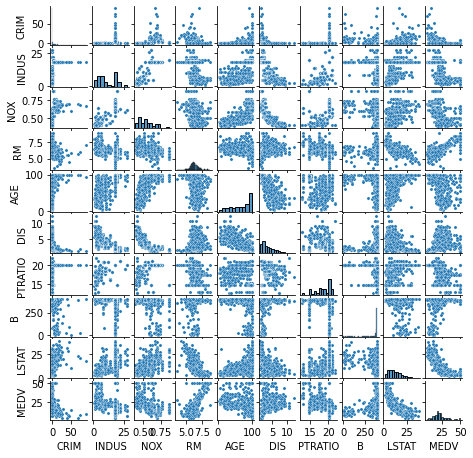

In [ ]:
g=sns.pairplot(data,plot_kws={"s":10})
g.fig.set_size_inches(6,6)

             CRIM     INDUS       NOX        RM       AGE       DIS   PTRATIO  \
CRIM     1.000000  0.406583  0.420972 -0.219247  0.352734 -0.379670  0.289946   
INDUS    0.406583  1.000000  0.763651 -0.391676  0.644779 -0.708027  0.383248   
NOX      0.420972  0.763651  1.000000 -0.302188  0.731470 -0.769230  0.188933   
RM      -0.219247 -0.391676 -0.302188  1.000000 -0.240265  0.205246 -0.355501   
AGE      0.352734  0.644779  0.731470 -0.240265  1.000000 -0.747881  0.261515   
DIS     -0.379670 -0.708027 -0.769230  0.205246 -0.747881  1.000000 -0.232471   
PTRATIO  0.289946  0.383248  0.188933 -0.355501  0.261515 -0.232471  1.000000   
B       -0.385064 -0.356977 -0.380051  0.128069 -0.273534  0.291512 -0.177383   
LSTAT    0.455621  0.603800  0.590879 -0.613808  0.602339 -0.496996  0.374044   
MEDV    -0.388305 -0.483725 -0.427321  0.695360 -0.376955  0.249929 -0.507787   

                B     LSTAT      MEDV  
CRIM    -0.385064  0.455621 -0.388305  
INDUS   -0.356977  0.603800 

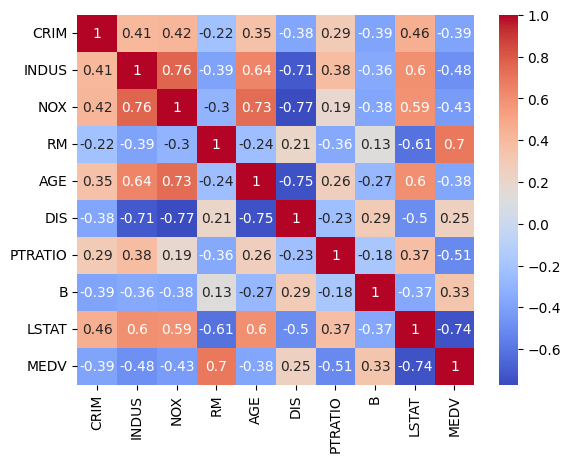

In [ ]:
# Построение корреляционной матрицы
corr_matrix = data.corr()
print(corr_matrix)
# Построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Проверим гипотезы о значимости коэффициентов корреляции:
for (columnName, columnData) in data.iteritems():
    for (columnName2, columnData2) in data.iteritems():
        print(st.pearsonr(data[columnName], data[columnName2]))

PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
PearsonRResult(statistic=0.4065834114062593, pvalue=1.4503489330273e-21)
PearsonRResult(statistic=0.4209717113924562, pvalue=3.7517392603571665e-23)
PearsonRResult(statistic=-0.21924670286251396, pvalue=6.346702984687696e-07)
PearsonRResult(statistic=0.35273425090136395, pvalue=2.854869350244229e-16)
PearsonRResult(statistic=-0.37967008695102444, pvalue=8.519948766926127e-19)
PearsonRResult(statistic=0.28994557927952025, pvalue=2.942922447359934e-11)
PearsonRResult(statistic=-0.38506394199422395, pvalue=2.487273973773737e-19)
PearsonRResult(statistic=0.45562147944794634, pvalue=2.654277231473225e-27)
PearsonRResult(statistic=-0.38830460858681154, pvalue=1.1739870821943826e-19)
PearsonRResult(statistic=0.4065834114062593, pvalue=1.4503489330273e-21)
PearsonRResult(statistic=1.0, pvalue=0.0)
PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)
PearsonRResult(statistic=-0.3916758526568436, pvalue=5.328457689510

In [ ]:
#Допустим, мы хотим проверить гипотезу о том,
#что коэффициент корреляции между ценой недвижимости ("NOX") и общей площадью ("DIS") является значимым.
#Тогда процедура проверки может выглядеть следующим образом:
#Вычисление коэффициента корреляции

#доп задание
# проверить значимость коэффициента корреляции по т статистике ....пирсона

from scipy.stats import t
corr_coef = np.corrcoef(data['NOX'], data['DIS'])[0, 1]
#Вычисление числа степеней свободы
n = len(data)
data_= n - 2
#Вычисление t-статистики
t_stat = corr_coef * ((n - 2) / (1 - corr_coef**2))**0.5
#Вычисление p-значения
p_value = t.sf(abs(t_stat), df=data_) * 2
#Результаты
print(f"Коэффициент корреляции: {corr_coef:.4f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значение: {p_value:.4f}")
print("Гипотеза о значимости коэффициента корреляции " + ("отвергается" if p_value < 0.05 else "не отвергается"))

Коэффициент корреляции: -0.7692
t-статистика: -27.0265
p-значение: 0.0000
Гипотеза о значимости коэффициента корреляции отвергается


In [ ]:
from scipy.stats import ttest_ind
data_t = pd.DataFrame(data)
# Проходим по всем парам столбцов и выводим их t-статистику и p-значение
for i in range(data_t.shape[1]):
    for j in range(i+1, data_t.shape[1]):
        t_stat, p_value = ttest_ind(data_t.iloc[:,i], data_t.iloc[:,j])
        print("t-статистика между столбцами", data_t.columns[i], "и", data_t.columns[j], ":", t_stat)
        print("p-значение:", p_value)
        if p_value < 0.05:
            print("Различия статистически значимы")
        else:
            print("Различия не являются статистически значимыми")

t-статистика между столбцами CRIM и INDUS : -15.381433731491324
p-значение: 3.9888063424427115e-48
Различия статистически значимы
t-статистика между столбцами CRIM и NOX : 7.998609767333665
p-значение: 3.4300403191029775e-15
Различия статистически значимы
t-статистика между столбцами CRIM и RM : -6.96220178923019
p-значение: 6.024192825435313e-12
Различия статистически значимы
t-статистика между столбцами CRIM и AGE : -49.64609042795799
p-значение: 3.0971152809961223e-273
Различия статистически значимы
t-статистика между столбцами CRIM и DIS : -0.4610867038844013
p-значение: 0.6448356731766989
Различия не являются статистически значимыми
t-статистика между столбцами CRIM и PTRATIO : -37.64034175629841
p-значение: 1.806269142780504e-194
Различия статистически значимы
t-статистика между столбцами CRIM и B : -86.6081911125079
p-значение: 0.0
Различия статистически значимы
t-статистика между столбцами CRIM и LSTAT : -18.188588172044998
p-значение: 3.644893485064078e-64
Различия статистичес

 
-13.98 x + 11.55
1.8067642652540064


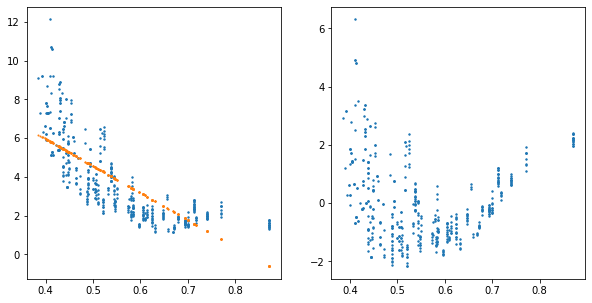

In [ ]:
#Построим уравнение линейной регрессии и диаграмму остатков регрессии, оценими дисперсию остатков
pole1='NOX'
pole2='DIS'
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=1)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))

In [ ]:
from sklearn.linear_model import LinearRegression
x = data['NOX']#отклик
y = data['DIS']#фактор
reg = LinearRegression().fit(x.values.reshape(-1,1), y)
print(f'Уравнение линейной регрессии: y = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} * x')

Уравнение линейной регрессии: y = 11.55 + -13.98 * x


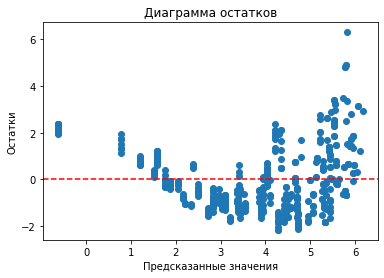

In [ ]:
#Построим диаграмму остатков
y_pred = reg.predict(x.values.reshape(-1,1))
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title('Диаграмма остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# Диаграмма остатков должна иметь равномерное распределение вокруг горизонтальной линии y=0,
# что указывает на то, что остатки распределены случайно и нет систематической ошибки.
# Оценим дисперсию остатков:

print(f'Дисперсия остатков: {residuals.var()}')

# Дисперсия остатков показывает, насколько разбросаны остатки вокруг среднего значения.

Дисперсия остатков: 1.8103420162743113


Если уравнение линейной регрессии описывает данные хорошо,то остатки должны быть случайными и распределенными равномерно вокруг нуля.

       5             4             3             2
-6247 x + 1.912e+04 x - 2.311e+04 x + 1.385e+04 x - 4151 x + 505
1.0724228545781866


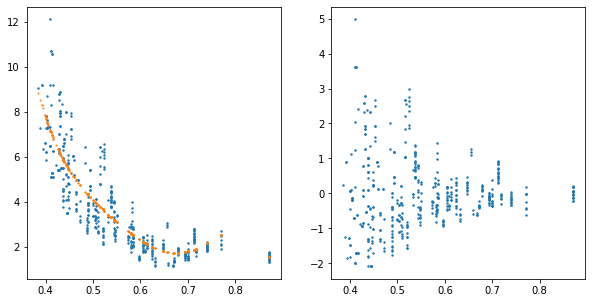

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
z=np.polyfit(data[pole1], data[pole2],deg=5)
f = np.poly1d(z)
plt.scatter(data[pole1], data[pole2],s=2)
plt.scatter(data[pole1],f(data[pole1]),s=1)
print(f)
residuals = data[pole2]-f(data[pole1])
plt.subplot (1, 2, 2)
plt.scatter(data[pole1],residuals,s=2)
print(np.var(residuals))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Построим уравнение полиномиальной регрессии для зависимой переменной "NOX" от независимой переменной "DIS":
x = data['NOX']
y = data['DIS']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.values.reshape(-1,1))
reg = LinearRegression().fit(X_poly, y)
print(f'Уравнение полиномиальной регрессии: y = {reg.intercept_:.2f} + {reg.coef_[1]:.2f} * x + {reg.coef_[2]:.2f} * x^2')

Уравнение полиномиальной регрессии: y = 28.74 + -74.17 * x + 50.43 * x^2


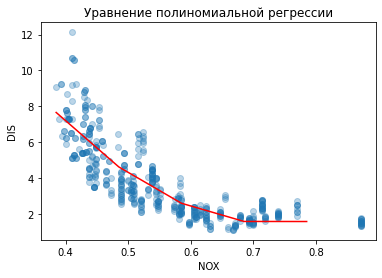

In [ ]:
#Построим график уравнения полиномиальной регрессии:
X_range = np.arange(x.min(), x.max(), 0.1).reshape(-1,1)
X_range_poly = poly.fit_transform(X_range)
y_pred = reg.predict(X_range_poly)
#График
plt.scatter(x, y, alpha=0.3)
plt.plot(X_range, y_pred, color='r')
plt.xlabel('NOX')
plt.ylabel('DIS')
plt.title('Уравнение полиномиальной регрессии')
plt.show()

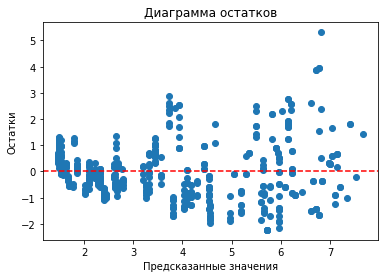

In [ ]:
#Построим диаграмму остатков:
y_pred = reg.predict(X_poly)
residuals = y - y_pred
#График
plt.scatter(y_pred, residuals)
plt.title('Диаграмма остатков')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
#Оценка дисперсии остатков:
print(f'Дисперсия остатков: {residuals.var()}')

Дисперсия остатков: 1.1718184200324424


In [ ]:
def getCorIndex(x,y,deg):
  z = np.polyfit(x,y,deg)
  f = np.poly1d(z)
  yk = f(data['NOX'])
  yb = data['DIS']
  return((len(yk)*np.sum(yk**2) - sum(yb)**2 )/(len(yb) * np.sum(yb**2) - sum(yb)**2)) ** 5
print("Индекс корреляции при полиноме")
for i in range(3,7):
  print(i,"порядка", getCorIndex(data['NOX'],data['DIS'],i))

Индекс корреляции при полиноме
3 порядка 0.24144747968222713
4 порядка 0.2419936489549891
5 порядка 0.24967043690314014
6 порядка 0.24970046738793442


In [ ]:
#Коэффициент корреляции Пирсона
corr_coef = data['NOX'].corr(data['DIS'], method='pearson')
print('Коэффициент корреляции Пирсона:', corr_coef)

Коэффициент корреляции Пирсона: -0.7692301132258278


In [ ]:
#Оценим Уровень приступности по городам на душу населения и зависимость от статуса населения и доли чернокожих по городам 
#CRIM: уровень преступности на душу населения по городам
#LSTAT: % более низкого статуса населения.
#B: результат уравнения B = 1000 (Bk - 0,63) ^ 2, где Bk — доля чернокожих по городам.
y = data['CRIM'].values
x = data[['LSTAT','B']].values.T
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0],x[1], ones)))
    results = sm.OLS(y, X).fit()
    return results
print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           5.33e-34
Time:                        06:54:58   Log-Likelihood:                -1729.3
No. Observations:                 506   AIC:                             3465.
Df Residuals:                     503   BIC:                             3477.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4377      0.050      8.831      0.0

In [ ]:
import statsmodels.api as sm
data1 = data['DIS']
df = pd.DataFrame(columns=['x','y'])
df['x']=data['DIS']
df['y']=data['NOX']

X = np.column_stack((data1**1, data1**2, data1**3))
res = sm.formula.ols(formula="y~X", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          2.71e-136
Time:                        06:44:07   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9341      0.021     45.110      0.0